In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import time
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from keras.preprocessing.image import ImageDataGenerator, load_img

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/vietnamese_document_data.zip' -d '/document_data'

In [4]:
!/usr/bin/python3
# -*- coding: <encoding name> -*-

Python 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> exit()


In [6]:
# -*- coding: utf-8 -*-

file_name = '/document_data/document_data'

X, y = [], []
classes = ['Chinh tri Xa hoi', 
           'Doi song', 
           'Khoa hoc', 
           'Kinh doanh', 
           'Phap luat', 
           'Suc khoe', 
           'The gioi', 
           'The thao',
           'Van hoa',
           'Vi tinh']

for class_name in classes:
    url = os.path.join(file_name, class_name)
    # print(url)
    for _, _, files in os.walk(url):
        for text in files:
            with open(os.path.join(url, text), encoding='utf-8', errors='ignore') as f:
                X.append(f.read())
            y.append(class_name)

In [7]:
df = pd.DataFrame({
    "text": X,
    "label": y
})

In [8]:
df.head()

,text,label
0, S  t   l   t r  n    n g   s  t    o  ...,Chinh tri Xa hoi
1, 2 . 9 1 6   t    n g   c h o   q u  n   l...,Chinh tri Xa hoi
2,H  m   n a y   2 8 / 3   t  i   T P   P l e i ...,Chinh tri Xa hoi
3,Q u y   t r  n h   ' l  t   x  c '   c  a   n ...,Chinh tri Xa hoi
4," T h i   c  n g    u ,   b   d  n   k i  n \...",Chinh tri Xa hoi


**Train test split data**
1. Split dataset into 80% train set and 20% test set
2. Convert label to number using LabelEncoding

In [9]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [10]:
print(train_df.shape)
print(test_df.shape)

(27007, 2)
(6752, 2)


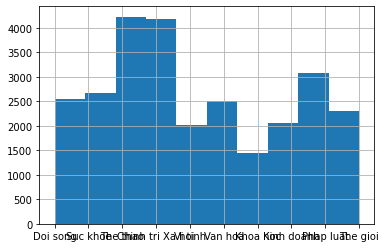

In [11]:
train_df['label'].hist()

In [12]:
# Encode label
label_encoder = LabelEncoder()
label_encoder.fit(train_df['label'])
print(list(label_encoder.classes_), '\n')

['Chinh tri Xa hoi', 'Doi song', 'Khoa hoc', 'Kinh doanh', 'Phap luat', 'Suc khoe', 'The gioi', 'The thao', 'Van hoa', 'Vi tinh'] 



In [13]:
y_train = label_encoder.transform(train_df['label'])
y_test = label_encoder.transform(test_df['label'])
X_train = train_df['text']
X_test = test_df['text']

In [14]:
y_test

array([3, 4, 1, ..., 5, 5, 7])

**Classification**

Use support vector machine algorithm to learn model

In [15]:
start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                             max_df=0.8,
                                             max_features=None)), 
                     ('tfidf', TfidfTransformer()),
                     ('clf', SVC(gamma='scale'))
                    ])
text_clf = text_clf.fit(X_train, y_train)
 
train_time = time.time() - start_time
print('Done training SVM in', train_time, 'seconds.')

# Save model
MODEL_PATH = '/content/drive/MyDrive/'
pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "svm.pkl"), 'wb'))

Done training SVM in 26.787238359451294 seconds.


**Evaluate model**

In [16]:
model = pickle.load(open(os.path.join(MODEL_PATH,"svm.pkl"), 'rb'))
y_pred = model.predict(X_test)
print('SVM, Accuracy =', np.mean(y_pred == y_test))

SVM, Accuracy = 0.15876777251184834


In [17]:
nb_model = pickle.load(open(os.path.join(MODEL_PATH,"svm.pkl"), 'rb'))
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=list(label_encoder.classes_)))

                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.00      0.00      0.00      1031
        Doi song       0.00      0.00      0.00       610
        Khoa hoc       0.00      0.00      0.00       384
      Kinh doanh       0.00      0.00      0.00       497
       Phap luat       0.00      0.00      0.00       789
        Suc khoe       0.00      0.00      0.00       720
        The gioi       0.00      0.00      0.00       595
        The thao       0.16      1.00      0.27      1072
         Van hoa       0.00      0.00      0.00       583
         Vi tinh       0.00      0.00      0.00       471

        accuracy                           0.16      6752
       macro avg       0.02      0.10      0.03      6752
    weighted avg       0.03      0.16      0.04      6752



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
